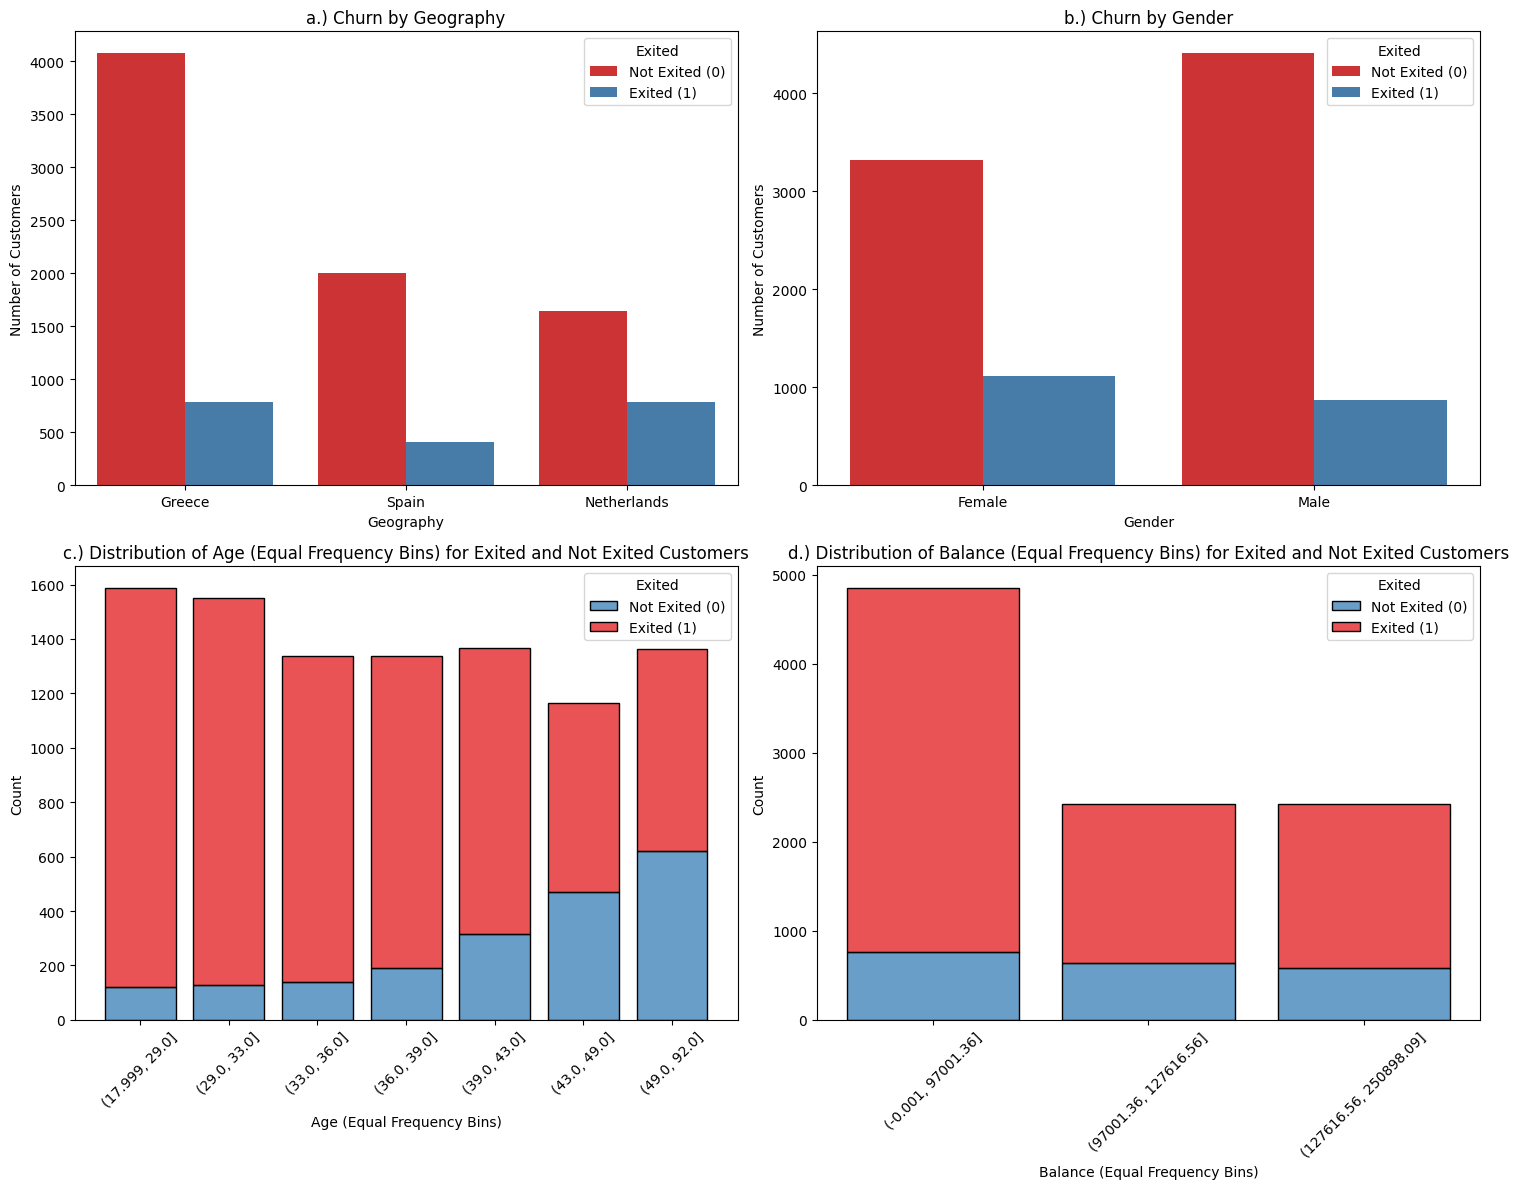

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get the directory of the current script
current_dir = os.path.dirname(os.path.abspath("Summative Data.csv"))

# Construct the path to the CSV file (one level up)
file_path = os.path.join(current_dir, "..", "Summative Data.csv")

# Read the CSV file
df = pd.read_csv(file_path)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Churn by Geography
sns.countplot(data=df, x="Geography", hue="Exited", palette="Set1", ax=axes[0, 0])
axes[0, 0].set_title("a.) Churn by Geography")
axes[0, 0].set_xlabel("Geography")
axes[0, 0].set_ylabel("Number of Customers")
axes[0, 0].legend(
    title="Exited", loc="upper right", labels=["Not Exited (0)", "Exited (1)"]
)

# Churn by Gender
sns.countplot(data=df, x="gender", hue="Exited", palette="Set1", ax=axes[0, 1])
axes[0, 1].set_title("b.) Churn by Gender")
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Number of Customers")
axes[0, 1].legend(
    title="Exited", loc="upper right", labels=["Not Exited (0)", "Exited (1)"]
)

# Create age bins and convert to string
df["age_bins"] = pd.qcut(df["age"], q=7, duplicates="drop")

# Convert bins to strings for sorting
df["age_bins"] = df["age_bins"].astype(str)

# Ensure age bins are sorted correctly
df["age_bins"] = pd.Categorical(
    df["age_bins"],
    categories=sorted(
        df["age_bins"].unique(), key=lambda x: float(x.split(",")[0][1:])
    ),
    ordered=True,
)

# Plot Age Distribution
sns.histplot(
    data=df,
    x="age_bins",
    hue="Exited",
    multiple="stack",
    shrink=0.8,
    palette="Set1",
    ax=axes[1, 0],
)
axes[1, 0].set_xlabel("Age (Equal Frequency Bins)")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title(
    "c.) Distribution of Age (Equal Frequency Bins) for Exited and Not Exited Customers"
)
axes[1, 0].legend(title="Exited", labels=["Not Exited (0)", "Exited (1)"])
axes[1, 0].tick_params(axis="x", rotation=45)

# Create balance bins
df["balance_bins"] = pd.qcut(df["balance"], q=4, duplicates="drop")

# Convert balance bins to strings for plotting
df["balance_bins"] = df["balance_bins"].astype(str)

# Sort balance bins for plotting
df["balance_bins"] = pd.Categorical(
    df["balance_bins"],
    categories=sorted(
        df["balance_bins"].unique(), key=lambda x: float(x.split(",")[0][1:])
    ),
    ordered=True,
)

# Plot Balance Distribution
sns.histplot(
    data=df,
    x="balance_bins",
    hue="Exited",
    multiple="stack",
    shrink=0.8,
    palette="Set1",
    ax=axes[1, 1],
)
axes[1, 1].set_xlabel("Balance (Equal Frequency Bins)")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title(
    "d.) Distribution of Balance (Equal Frequency Bins) for Exited and Not Exited Customers"
)
axes[1, 1].legend(title="Exited", labels=["Not Exited (0)", "Exited (1)"])
axes[1, 1].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()